In [1]:
!nvidia-smi

Fri Oct  8 16:29:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3080    On   | 00000000:2B:00.0  On |                  N/A |
|  0%   36C    P8    21W / 340W |    510MiB / 10009MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
import yaml
import glob
import matplotlib.pyplot as plt
import os

from utils.plots import plot_results
from IPython.display import Image
from IPython.core.magic import register_line_cell_magic

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
%matplotlib inline

Setup complete. Using torch 1.8.1+cu111 _CudaDeviceProperties(name='GeForce RTX 3080', major=8, minor=6, total_memory=10009MB, multi_processor_count=68)


In [3]:
%cd pet_dataset/
filename = "data.yaml"

with open(filename, "w") as f:
    f.write("train: train/images\n")
    f.write("val: valid/images\n")
    f.write("\n")
    f.write("nc: 37\n")
    f.write("names: ['cat-Abyssinian', 'cat-Bengal', 'cat-Birman', 'cat-Bombay', 'cat-British_Shorthair', 'cat-Egyptian_Mau', 'cat-Maine_Coon', 'cat-Persian', 'cat-Ragdoll', 'cat-Russian_Blue', 'cat-Siamese', 'cat-Sphynx', 'dog-american_bulldog', 'dog-american_pit_bull_terrier', 'dog-basset_hound', 'dog-beagle', 'dog-boxer', 'dog-chihuahua', 'dog-english_cocker_spaniel', 'dog-english_setter', 'dog-german_shorthaired', 'dog-great_pyrenees', 'dog-havanese', 'dog-japanese_chin', 'dog-keeshond', 'dog-leonberger', 'dog-miniature_pinscher', 'dog-newfoundland', 'dog-pomeranian', 'dog-pug', 'dog-saint_bernard', 'dog-samoyed', 'dog-scottish_terrier', 'dog-shiba_inu', 'dog-staffordshire_bull_terrier', 'dog-wheaten_terrier', 'dog-yorkshire_terrier']\n")
    f.close()
%cd ..

/home/rohan/object_detection/yolov5/pet_dataset
/home/rohan/object_detection/yolov5


In [4]:
%cat pet_dataset/data.yaml

train: train/images
val: valid/images

nc: 37
names: ['cat-Abyssinian', 'cat-Bengal', 'cat-Birman', 'cat-Bombay', 'cat-British_Shorthair', 'cat-Egyptian_Mau', 'cat-Maine_Coon', 'cat-Persian', 'cat-Ragdoll', 'cat-Russian_Blue', 'cat-Siamese', 'cat-Sphynx', 'dog-american_bulldog', 'dog-american_pit_bull_terrier', 'dog-basset_hound', 'dog-beagle', 'dog-boxer', 'dog-chihuahua', 'dog-english_cocker_spaniel', 'dog-english_setter', 'dog-german_shorthaired', 'dog-great_pyrenees', 'dog-havanese', 'dog-japanese_chin', 'dog-keeshond', 'dog-leonberger', 'dog-miniature_pinscher', 'dog-newfoundland', 'dog-pomeranian', 'dog-pug', 'dog-saint_bernard', 'dog-samoyed', 'dog-scottish_terrier', 'dog-shiba_inu', 'dog-staffordshire_bull_terrier', 'dog-wheaten_terrier', 'dog-yorkshire_terrier']


In [5]:
!python3 resize.py --dir pet_dataset/ --size 416

Created ./resized_dataset directory
Successfully copied all files to the resized_dataset folder
Resizing images...
100%|█████████████████████████████████████████| 2/2 [00:00<00:00, 111848.11it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████| 2508/2508 [00:00<00:00, 2582694.43it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████| 716/716 [00:00<00:00, 2958740.56it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████| 356/356 [00:00<00:00, 2744801.88it/s]
Datset resized!


In [6]:
!python3 augment.py --n 3

Successfully copied all files to the Dataset folder


Before Augmentation:
Number of images in the train folder: 2508
Number of images in the valid folder: 716
Number of images in the test folder: 356


yaml file read successfully!

Labels and Indices: 
{0: 'cat-Abyssinian', 1: 'cat-Bengal', 2: 'cat-Birman', 3: 'cat-Bombay', 4: 'cat-British_Shorthair', 5: 'cat-Egyptian_Mau', 6: 'cat-Maine_Coon', 7: 'cat-Persian', 8: 'cat-Ragdoll', 9: 'cat-Russian_Blue', 10: 'cat-Siamese', 11: 'cat-Sphynx', 12: 'dog-american_bulldog', 13: 'dog-american_pit_bull_terrier', 14: 'dog-basset_hound', 15: 'dog-beagle', 16: 'dog-boxer', 17: 'dog-chihuahua', 18: 'dog-english_cocker_spaniel', 19: 'dog-english_setter', 20: 'dog-german_shorthaired', 21: 'dog-great_pyrenees', 22: 'dog-havanese', 23: 'dog-japanese_chin', 24: 'dog-keeshond', 25: 'dog-leonberger', 26: 'dog-miniature_pinscher', 27: 'dog-newfoundland', 28: 'dog-pomeranian', 29: 'dog-pug', 30: 'dog-saint_bernard', 31: 'dog-samoyed', 32: 'dog-scottish_terr

In [7]:
!python3 visualize.py

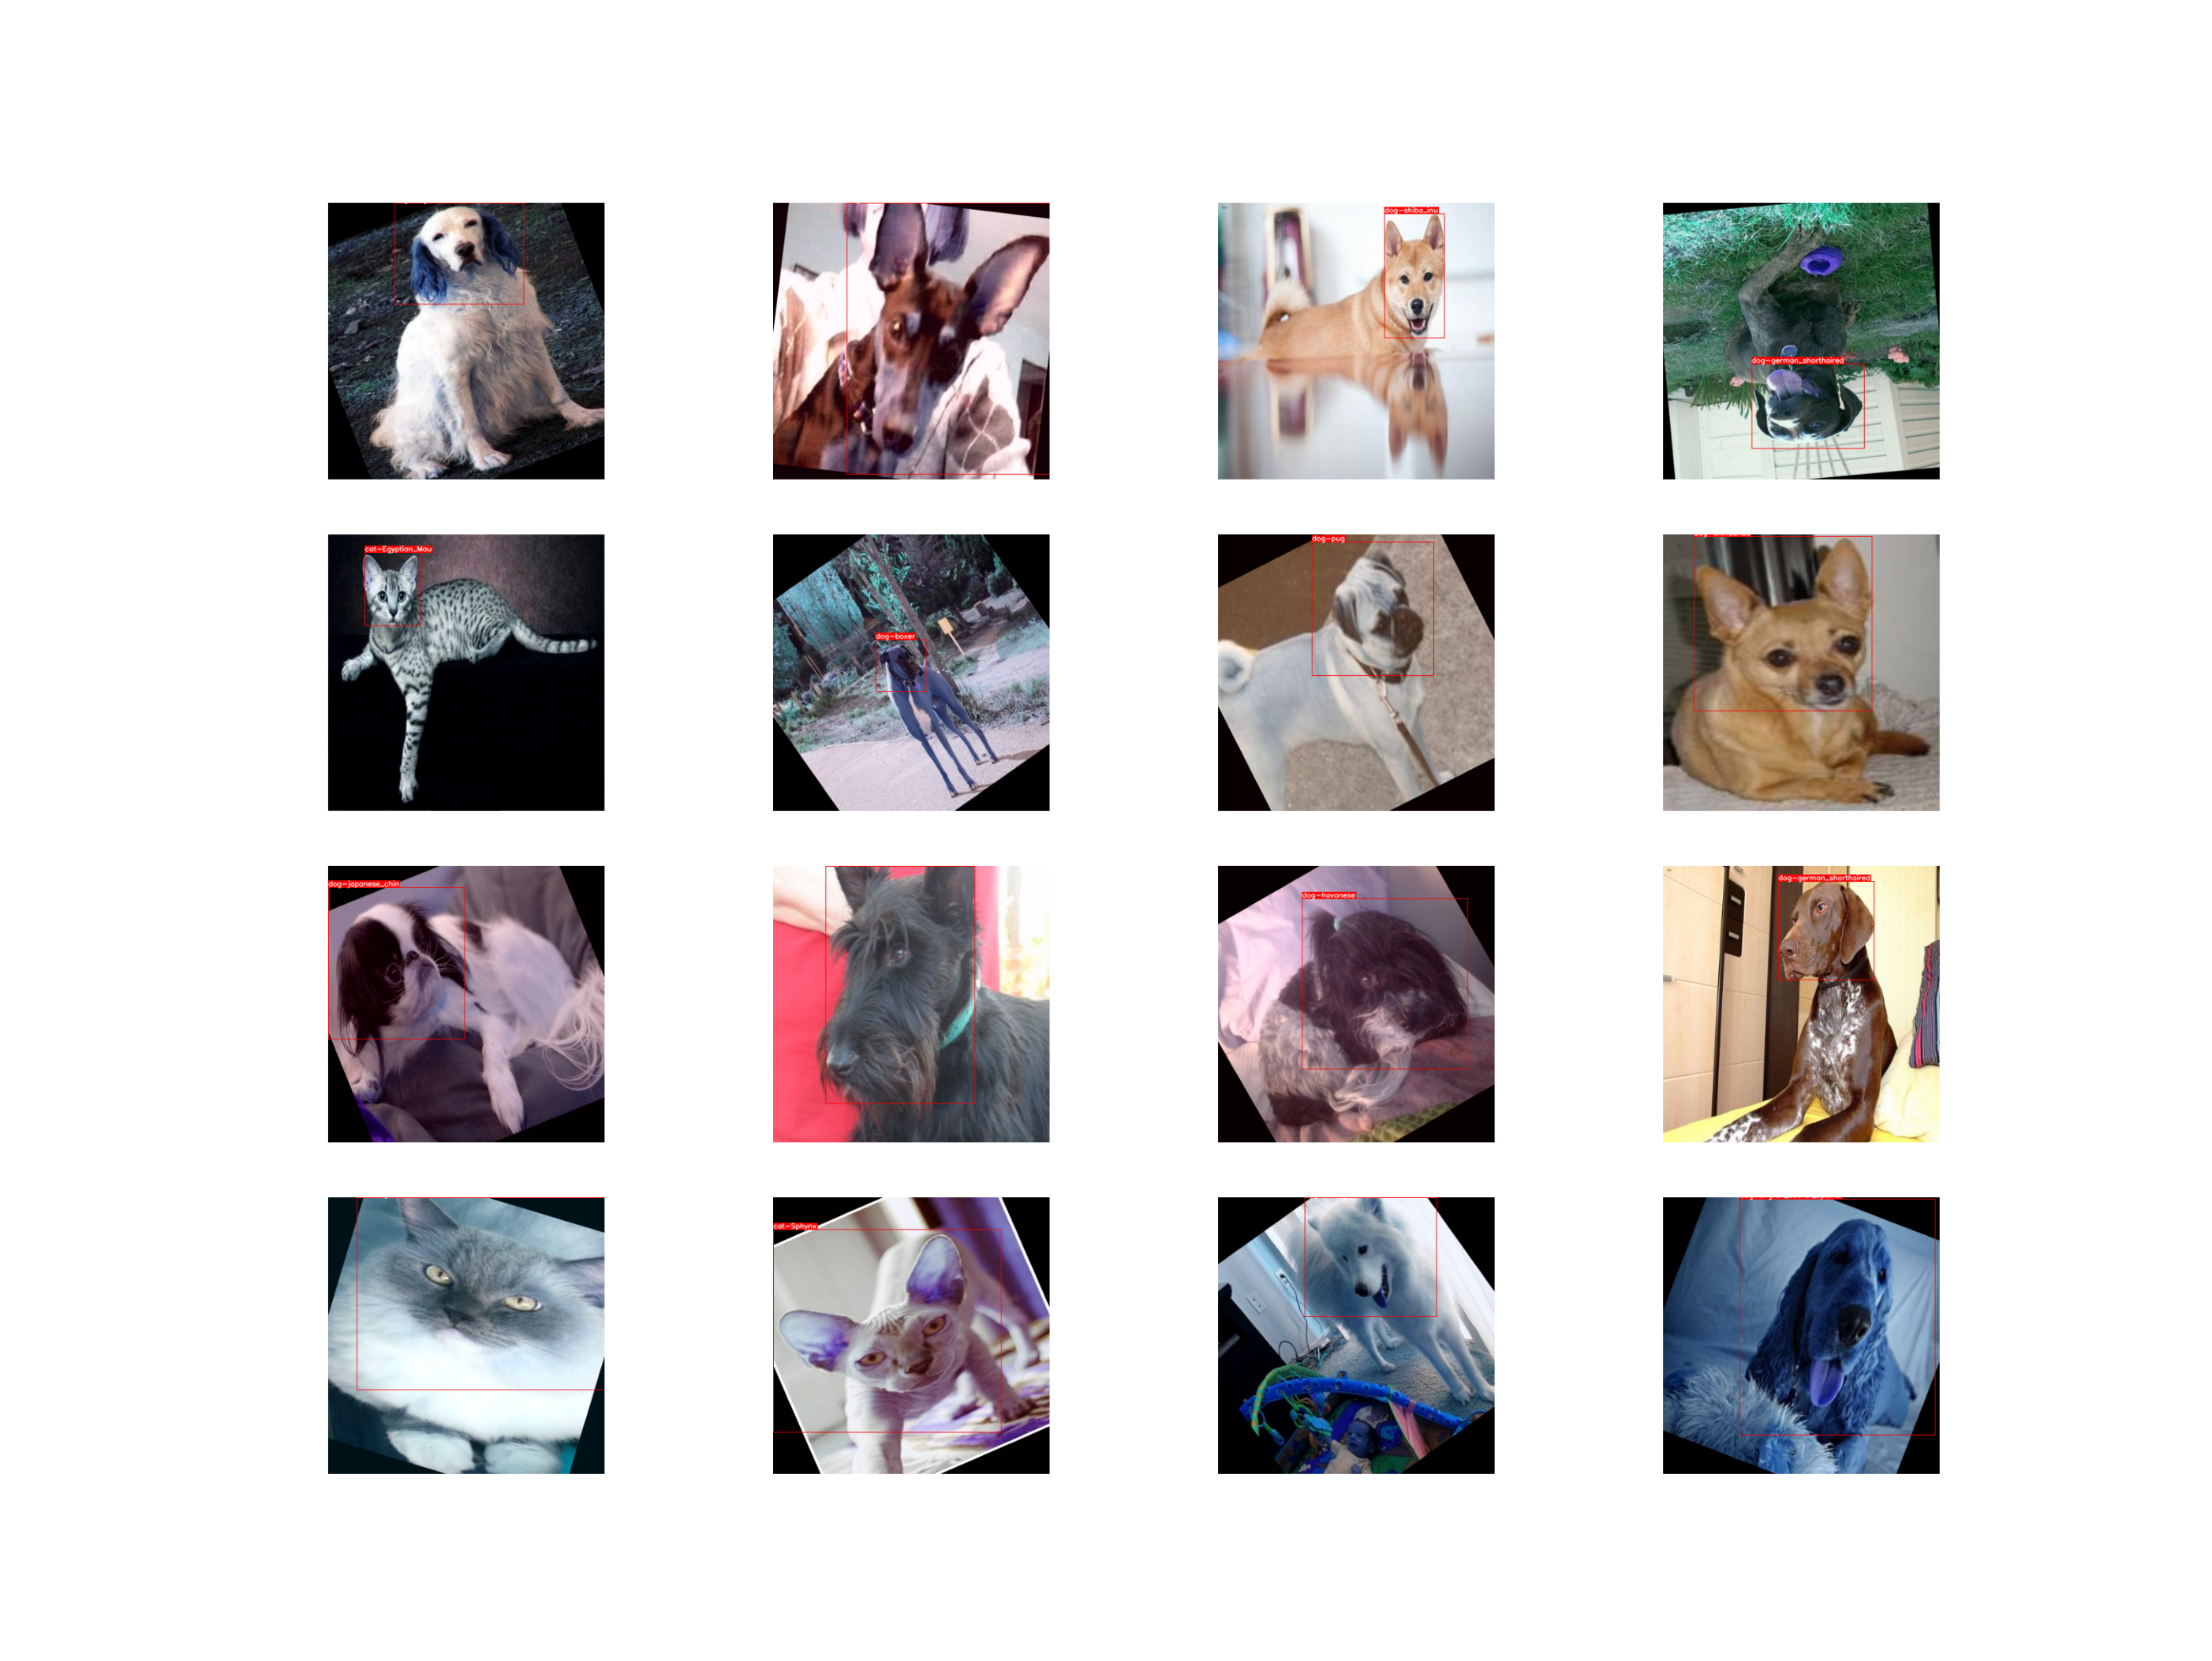

In [8]:
image = plt.imread("./augmented_images.png")
plt.figure(figsize = (50, 50))
plt.axis("off")
plt.imshow(image)
plt.show()

In [9]:
!rm dataset/data.yaml
%cd dataset/
filename = "data.yaml"

with open(filename, "w") as f:
    f.write(f"train: {os.getcwd()}/train/images\n")
    f.write(f"val: {os.getcwd()}/valid/images\n")
    f.write("\n")
    f.write("nc: 37\n")
    f.write("names: ['cat-Abyssinian', 'cat-Bengal', 'cat-Birman', 'cat-Bombay', 'cat-British_Shorthair', 'cat-Egyptian_Mau', 'cat-Maine_Coon', 'cat-Persian', 'cat-Ragdoll', 'cat-Russian_Blue', 'cat-Siamese', 'cat-Sphynx', 'dog-american_bulldog', 'dog-american_pit_bull_terrier', 'dog-basset_hound', 'dog-beagle', 'dog-boxer', 'dog-chihuahua', 'dog-english_cocker_spaniel', 'dog-english_setter', 'dog-german_shorthaired', 'dog-great_pyrenees', 'dog-havanese', 'dog-japanese_chin', 'dog-keeshond', 'dog-leonberger', 'dog-miniature_pinscher', 'dog-newfoundland', 'dog-pomeranian', 'dog-pug', 'dog-saint_bernard', 'dog-samoyed', 'dog-scottish_terrier', 'dog-shiba_inu', 'dog-staffordshire_bull_terrier', 'dog-wheaten_terrier', 'dog-yorkshire_terrier']\n")
    f.close()
%cd ..

/home/rohan/object_detection/yolov5/dataset
/home/rohan/object_detection/yolov5


In [10]:
%cat dataset/data.yaml

train: /home/rohan/object_detection/yolov5/dataset/train/images
val: /home/rohan/object_detection/yolov5/dataset/valid/images

nc: 37
names: ['cat-Abyssinian', 'cat-Bengal', 'cat-Birman', 'cat-Bombay', 'cat-British_Shorthair', 'cat-Egyptian_Mau', 'cat-Maine_Coon', 'cat-Persian', 'cat-Ragdoll', 'cat-Russian_Blue', 'cat-Siamese', 'cat-Sphynx', 'dog-american_bulldog', 'dog-american_pit_bull_terrier', 'dog-basset_hound', 'dog-beagle', 'dog-boxer', 'dog-chihuahua', 'dog-english_cocker_spaniel', 'dog-english_setter', 'dog-german_shorthaired', 'dog-great_pyrenees', 'dog-havanese', 'dog-japanese_chin', 'dog-keeshond', 'dog-leonberger', 'dog-miniature_pinscher', 'dog-newfoundland', 'dog-pomeranian', 'dog-pug', 'dog-saint_bernard', 'dog-samoyed', 'dog-scottish_terrier', 'dog-shiba_inu', 'dog-staffordshire_bull_terrier', 'dog-wheaten_terrier', 'dog-yorkshire_terrier']


In [11]:
# define number of classes based on YAML
with open("dataset/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [12]:
%cat models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [13]:
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [14]:
%%writetemplate models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [15]:
%pwd

'/home/rohan/object_detection/yolov5'

In [16]:
%%time
!python train.py --img 416 --batch 8 --epochs 100 --data dataset/data.yaml --cfg models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_pets_results  --cache

github: skipping check (not a git repository)
YOLOv5 🚀 2021-8-4 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 3080, 10009.625MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=True, cfg='models/custom_yolov5s.yaml', data='dataset/data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5s_pets_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_pets_results', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, wa

               Class      Images      Labels           P           R      mAP@.5
                 all         716         718       0.793       0.775       0.849       0.626

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     30/99     1.02G   0.03012   0.01197   0.03283   0.07492        11       416
               Class      Images      Labels           P           R      mAP@.5
                 all         716         718        0.79       0.789       0.857       0.636

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     31/99     1.02G   0.02966   0.01206   0.03271   0.07443        21       416
               Class      Images      Labels           P           R      mAP@.5
                 all         716         718       0.784       0.802       0.857       0.644

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     32/99     1.02G   0.02927   0.01208   0.03196   0.07331        20


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     54/99     1.02G   0.02601    0.0108   0.02215   0.05896        14       416
               Class      Images      Labels           P           R      mAP@.5
                 all         716         718       0.826       0.857         0.9       0.713

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     55/99     1.02G   0.02572   0.01081   0.02228   0.05882        17       416
               Class      Images      Labels           P           R      mAP@.5
                 all         716         718       0.863        0.83       0.904        0.72

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     56/99     1.02G   0.02589   0.01076   0.02153   0.05818        15       416
               Class      Images      Labels           P           R      mAP@.5
                 all         716         718       0.872       0.822       0.907  

100 epochs completed in 1.953 hours.

Optimizer stripped from runs/train/yolov5s_pets_results/weights/last.pt, 14.6MB
Optimizer stripped from runs/train/yolov5s_pets_results/weights/best.pt, 14.6MB
Images sizes do not match. This will causes images to be display incorrectly in the UI.

wandb: Waiting for W&B process to finish, PID 14113
wandb: Program ended successfully.
wandb:                                                                                
wandb: Find user logs for this run at: /home/rohan/object_detection/yolov5/wandb/run-20211008_093936-1gltw5oi/logs/debug.log
wandb: Find internal logs for this run at: /home/rohan/object_detection/yolov5/wandb/run-20211008_093936-1gltw5oi/logs/debug-internal.log
wandb: Run summary:
wandb:                 train/box_loss 0.02066
wandb:                 train/obj_loss 0.00915
wandb:                 train/cls_loss 0.01314
wandb:              metrics/precision 0.86305
wandb:                 metrics/recall 0.88326
wandb:                metr

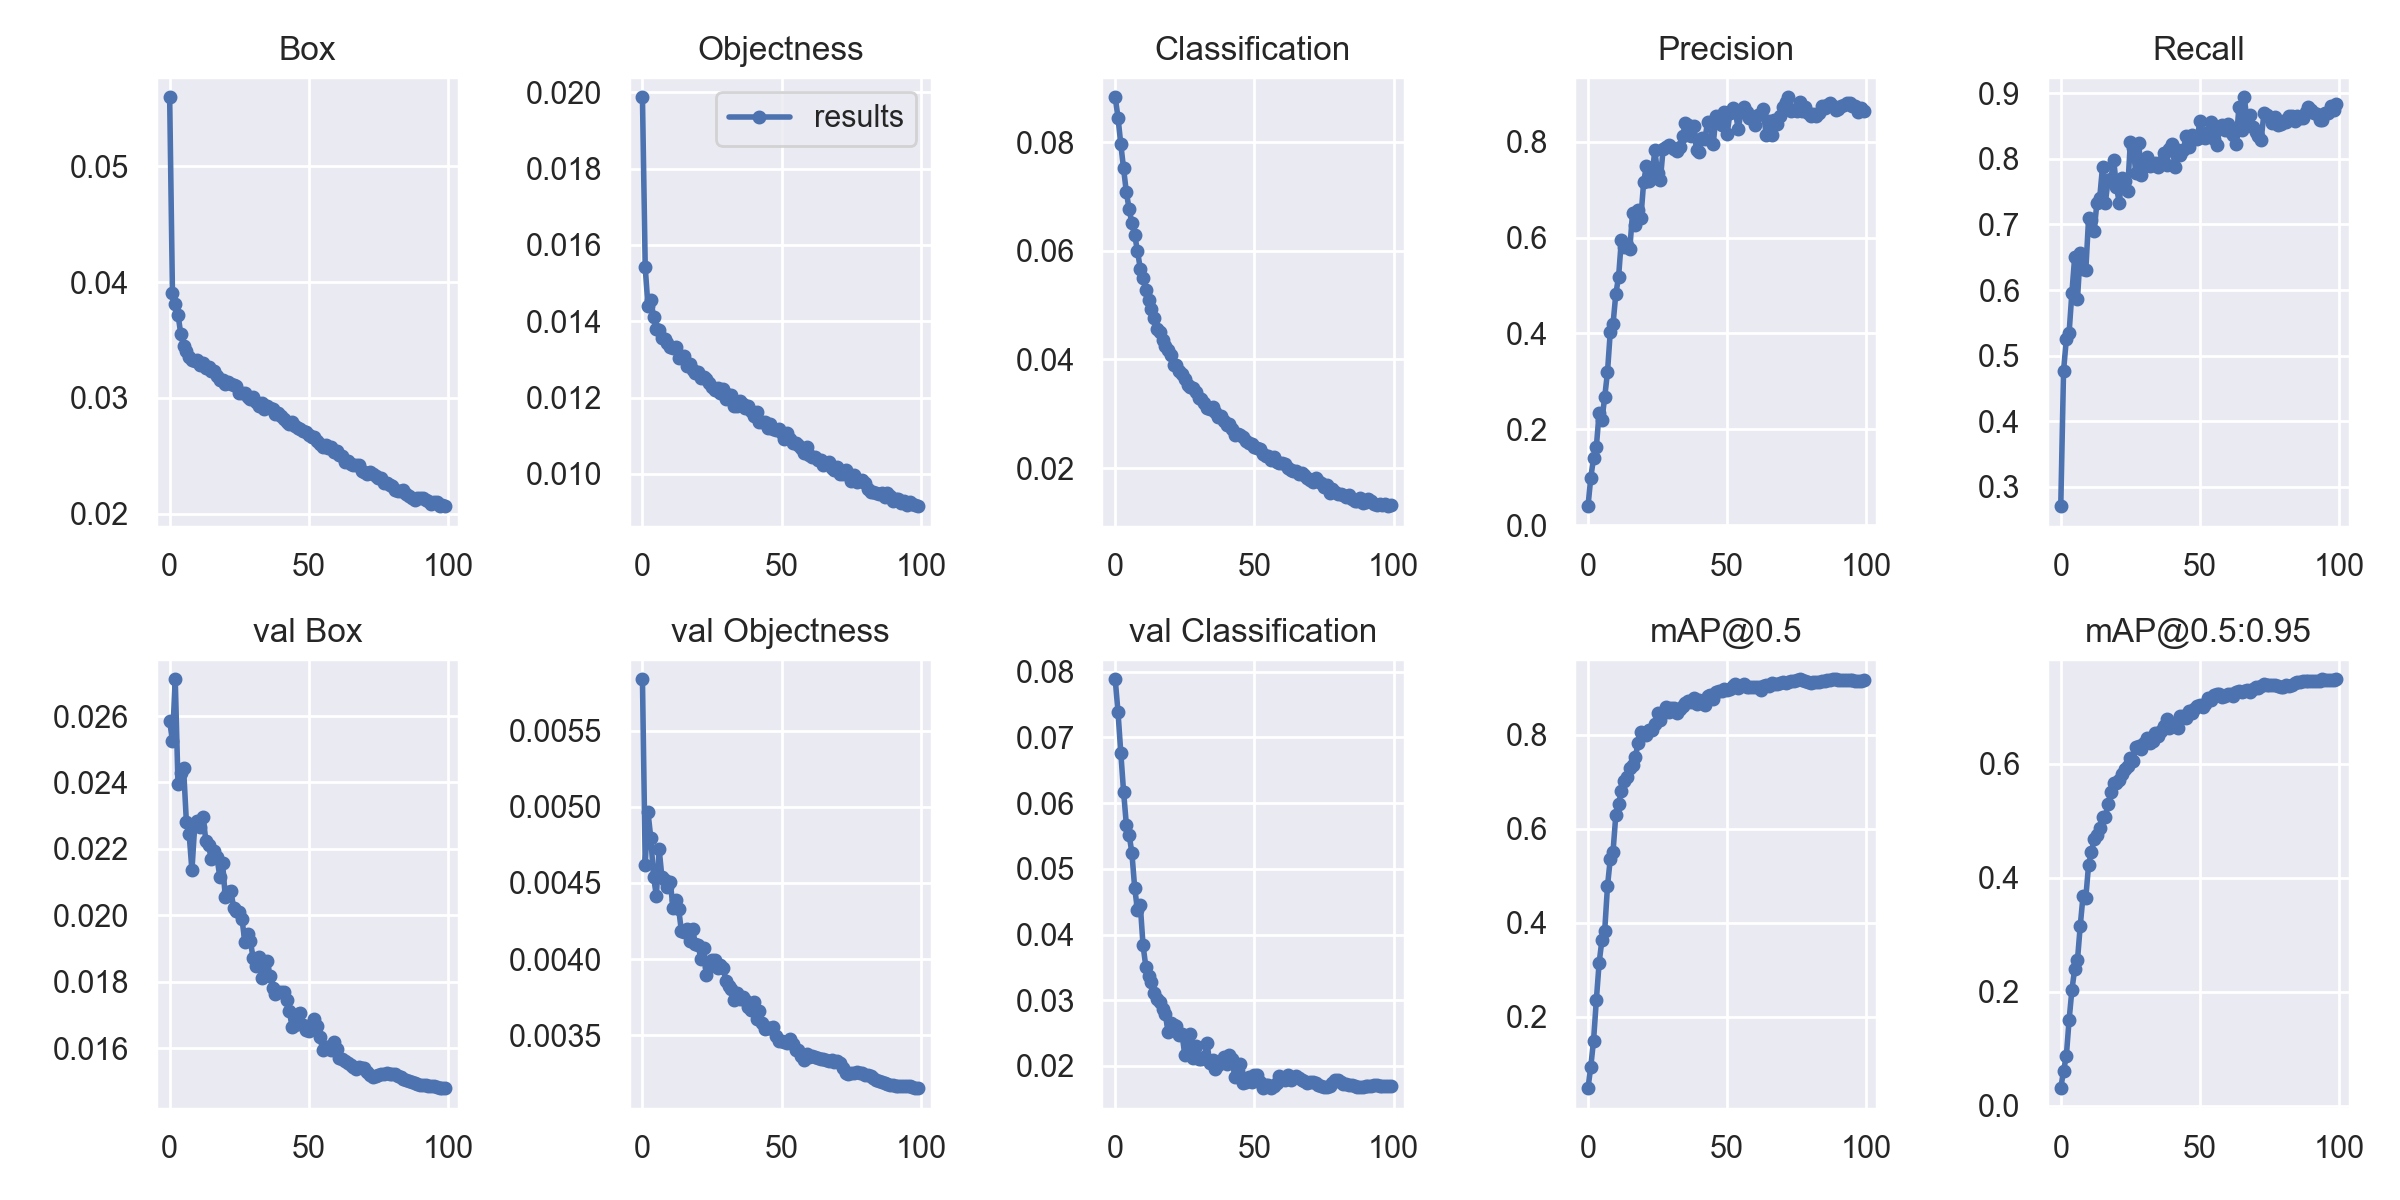

In [17]:
Image(filename = "/home/rohan/object_detection/yolov5/runs/train/yolov5s_pets_results/results.png", width = 1000)

In [18]:
!python detect.py --weights runs/train/yolov5s_pets_results/weights/best.pt --img 416 --conf 0.4 --source dataset/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='dataset/test/images', update=False, view_img=False, weights=['runs/train/yolov5s_pets_results/weights/best.pt'])
YOLOv5 🚀 2021-8-4 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 3080, 10009.625MB)

Fusing layers... 
Model Summary: 224 layers, 7151002 parameters, 0 gradients, 16.6 GFLOPS
image 1/356 /home/rohan/object_detection/yolov5/dataset/test/images/Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg: 416x416 1 cat-Abyssinian, Done. (0.008s)
image 2/356 /home/rohan/object_detection/yolov5/dataset/test/images/Abyssinian_131_jpg.rf.3aeee0801499f335e3a59b51189e1351.jpg: 416x416 1 cat-Abyssinian, Done. (0.008s)
image 3/356 /home/rohan/object_detection/yolov5/dataset/test/images/Abyssini

image 48/356 /home/rohan/object_detection/yolov5/dataset/test/images/British_Shorthair_164_jpg.rf.8d27185e8344301592da98df828ab073.jpg: 416x416 1 cat-British_Shorthair, Done. (0.008s)
image 49/356 /home/rohan/object_detection/yolov5/dataset/test/images/British_Shorthair_166_jpg.rf.d18846beff566700c2e16e295bb701e4.jpg: 416x416 1 cat-British_Shorthair, Done. (0.007s)
image 50/356 /home/rohan/object_detection/yolov5/dataset/test/images/British_Shorthair_177_jpg.rf.5efbf04740eeac07cdd83e5773d24221.jpg: 416x416 1 cat-British_Shorthair, Done. (0.007s)
image 51/356 /home/rohan/object_detection/yolov5/dataset/test/images/British_Shorthair_187_jpg.rf.24d36402bce6b82092dc93876c65bb71.jpg: 416x416 1 cat-British_Shorthair, Done. (0.007s)
image 52/356 /home/rohan/object_detection/yolov5/dataset/test/images/British_Shorthair_193_jpg.rf.ab376d75fb05acc1ec59f06228ebe5bb.jpg: 416x416 1 cat-British_Shorthair, Done. (0.007s)
image 53/356 /home/rohan/object_detection/yolov5/dataset/test/images/British_Sho

image 98/356 /home/rohan/object_detection/yolov5/dataset/test/images/Russian_Blue_158_jpg.rf.8bb44431bc9dea9b2093995bd7ccda47.jpg: 416x416 1 cat-Russian_Blue, Done. (0.008s)
image 99/356 /home/rohan/object_detection/yolov5/dataset/test/images/Russian_Blue_174_jpg.rf.7a3b6565101bc28aaf8709a725ac7563.jpg: 416x416 1 cat-Russian_Blue, Done. (0.010s)
image 100/356 /home/rohan/object_detection/yolov5/dataset/test/images/Russian_Blue_183_jpg.rf.657126ba93aa9a89ba60337fd90015e7.jpg: 416x416 1 cat-Russian_Blue, Done. (0.007s)
image 101/356 /home/rohan/object_detection/yolov5/dataset/test/images/Russian_Blue_18_jpg.rf.c1a3dd07b2239128d1d1a9cefed34163.jpg: 416x416 1 cat-Russian_Blue, Done. (0.008s)
image 102/356 /home/rohan/object_detection/yolov5/dataset/test/images/Russian_Blue_199_jpg.rf.3b28c3f929bcca88072d214bdf63343b.jpg: 416x416 1 cat-Russian_Blue, Done. (0.009s)
image 103/356 /home/rohan/object_detection/yolov5/dataset/test/images/Siamese_100_jpg.rf.626c287e034f7b8ffa56fd433bf0c652.jpg: 4

image 146/356 /home/rohan/object_detection/yolov5/dataset/test/images/basset_hound_102_jpg.rf.8a27c0dda5fb29d1c6984fa7a0f63800.jpg: 416x416 1 dog-basset_hound, Done. (0.009s)
image 147/356 /home/rohan/object_detection/yolov5/dataset/test/images/basset_hound_127_jpg.rf.eb5cd790e59f553f598b6b302e635f9c.jpg: 416x416 1 dog-basset_hound, Done. (0.007s)
image 148/356 /home/rohan/object_detection/yolov5/dataset/test/images/basset_hound_143_jpg.rf.b01e495fd4734a7453d44419c599af06.jpg: 416x416 1 dog-basset_hound, Done. (0.007s)
image 149/356 /home/rohan/object_detection/yolov5/dataset/test/images/basset_hound_156_jpg.rf.652ecf6bbe1fdc619fff8f26ef7e73b0.jpg: 416x416 1 dog-basset_hound, Done. (0.007s)
image 150/356 /home/rohan/object_detection/yolov5/dataset/test/images/basset_hound_180_jpg.rf.eb5cdeb097bc231adb06ac7c5c45fdc9.jpg: 416x416 1 dog-beagle, Done. (0.007s)
image 151/356 /home/rohan/object_detection/yolov5/dataset/test/images/basset_hound_182_jpg.rf.7900c7f48e47b03e452dc92c0687bd54.jpg:

image 196/356 /home/rohan/object_detection/yolov5/dataset/test/images/german_shorthaired_118_jpg.rf.5c4d0bded6d34eedf1c260c712435339.jpg: 416x416 1 dog-german_shorthaired, Done. (0.008s)
image 197/356 /home/rohan/object_detection/yolov5/dataset/test/images/german_shorthaired_121_jpg.rf.9482f5dfc3b9b452f83b9716e119ebbd.jpg: 416x416 1 dog-german_shorthaired, Done. (0.008s)
image 198/356 /home/rohan/object_detection/yolov5/dataset/test/images/german_shorthaired_14_jpg.rf.496ff83b5e258e4bd1aeb45b648ed13c.jpg: 416x416 1 dog-german_shorthaired, Done. (0.007s)
image 199/356 /home/rohan/object_detection/yolov5/dataset/test/images/german_shorthaired_150_jpg.rf.859cf03623a6023a128beaa24005df0e.jpg: 416x416 1 dog-german_shorthaired, Done. (0.007s)
image 200/356 /home/rohan/object_detection/yolov5/dataset/test/images/german_shorthaired_16_jpg.rf.11129d3c1d89da07a096c618075a4868.jpg: 416x416 1 dog-german_shorthaired, Done. (0.007s)
image 201/356 /home/rohan/object_detection/yolov5/dataset/test/imag

image 243/356 /home/rohan/object_detection/yolov5/dataset/test/images/keeshond_167_jpg.rf.4e2e21ef903c2644dac9ba1b8dcf97cd.jpg: 416x416 1 dog-keeshond, Done. (0.007s)
image 244/356 /home/rohan/object_detection/yolov5/dataset/test/images/leonberger_112_jpg.rf.fe221a67a84b04debc4b5d7ce0555784.jpg: 416x416 1 dog-leonberger, Done. (0.007s)
image 245/356 /home/rohan/object_detection/yolov5/dataset/test/images/leonberger_127_jpg.rf.e546fb18911f0ae5a4b31fcf630db158.jpg: 416x416 1 dog-leonberger, Done. (0.007s)
image 246/356 /home/rohan/object_detection/yolov5/dataset/test/images/leonberger_137_jpg.rf.16707a9dd175b9fb26b86aaf08a74a36.jpg: 416x416 1 dog-leonberger, Done. (0.007s)
image 247/356 /home/rohan/object_detection/yolov5/dataset/test/images/leonberger_149_jpg.rf.3df9c605907fb3911467f2abf7eb7512.jpg: 416x416 1 dog-leonberger, 1 dog-newfoundland, Done. (0.008s)
image 248/356 /home/rohan/object_detection/yolov5/dataset/test/images/leonberger_160_jpg.rf.1ed6ecf86e7f89569c9041d5feefda04.jpg:

image 291/356 /home/rohan/object_detection/yolov5/dataset/test/images/saint_bernard_143_jpg.rf.09efbb3012a0d2aa4ce31b24894b4c2d.jpg: 416x416 1 dog-saint_bernard, Done. (0.008s)
image 292/356 /home/rohan/object_detection/yolov5/dataset/test/images/saint_bernard_157_jpg.rf.8b8b2637c71d185074db0d88bbb571ac.jpg: 416x416 1 dog-saint_bernard, Done. (0.007s)
image 293/356 /home/rohan/object_detection/yolov5/dataset/test/images/saint_bernard_163_jpg.rf.0df77e1766aa07e6aebcc0ec0af3edd4.jpg: 416x416 1 dog-saint_bernard, Done. (0.007s)
image 294/356 /home/rohan/object_detection/yolov5/dataset/test/images/saint_bernard_166_jpg.rf.4a196baa1171afedeb6e6b1ec11c928a.jpg: 416x416 1 dog-saint_bernard, Done. (0.007s)
image 295/356 /home/rohan/object_detection/yolov5/dataset/test/images/saint_bernard_179_jpg.rf.d2179ce97410680346750e1dc69e2ae4.jpg: 416x416 1 dog-saint_bernard, Done. (0.008s)
image 296/356 /home/rohan/object_detection/yolov5/dataset/test/images/saint_bernard_17_jpg.rf.31ce6cba3f49ad4b1cbb7

image 338/356 /home/rohan/object_detection/yolov5/dataset/test/images/wheaten_terrier_126_jpg.rf.dd7608adea9a374c47c3f9e26567f6a9.jpg: 416x416 Done. (0.009s)
image 339/356 /home/rohan/object_detection/yolov5/dataset/test/images/wheaten_terrier_131_jpg.rf.8ff32f62df3f8a2e4d608048de999516.jpg: 416x416 1 dog-wheaten_terrier, Done. (0.008s)
image 340/356 /home/rohan/object_detection/yolov5/dataset/test/images/wheaten_terrier_137_jpg.rf.5c37804e4bf4a62c7c59bcbbd51eb005.jpg: 416x416 1 dog-wheaten_terrier, Done. (0.008s)
image 341/356 /home/rohan/object_detection/yolov5/dataset/test/images/wheaten_terrier_141_jpg.rf.ce5fe30e47e5ccf303057f6acc7ab702.jpg: 416x416 1 dog-wheaten_terrier, Done. (0.007s)
image 342/356 /home/rohan/object_detection/yolov5/dataset/test/images/wheaten_terrier_147_jpg.rf.353bd39b07ed8fc65e2247e8430d56fe.jpg: 416x416 1 dog-wheaten_terrier, Done. (0.007s)
image 343/356 /home/rohan/object_detection/yolov5/dataset/test/images/wheaten_terrier_150_jpg.rf.31c0297b122d823e99112

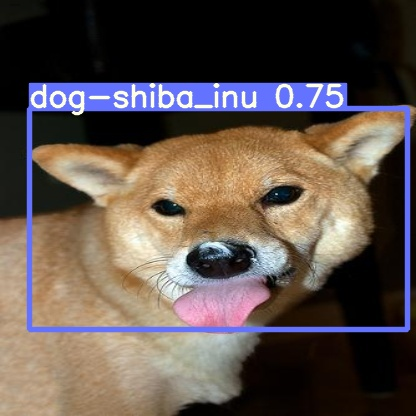

In [19]:
display(Image(filename = "runs/detect/exp14/shiba_inu_132_jpg.rf.d78b9415e906d676483604c844a0c98c.jpg"))